In [ ]:
import pandas as pd


# 读取 CSV 文件
df = pd.read_csv('./data/shenzhen_orders_0324.csv', dtype=str)

# 提取 order_id 和 station_id，转换为字典
order_station_dict = df.set_index('order_id')['station_id'].to_dict()

# 打印结果
for k,v in order_station_dict.items():
    print(f"Order ID: {k}, Station ID: {v}")
    break

Order ID: 1649296900021358594, Station ID: 1631470956459929601


In [17]:
import copy

class MyClass:
    def __init__(self, value):
        self.value = value

original_list = [MyClass(1), MyClass(2)]
shallow_copied_list = copy.copy(original_list)

shallow_copied_list[0].value = 100
print(original_list[0].value)  # 输出 3

100


In [ ]:
from component import *
import importlib
import simulator
importlib.reload(simulator)
from simulator import *
import inspect
from heuristic_reposition import *

def return_dispatch_list(orders:List[Order]):
    
    dispatch_list :List[Dispatch]= []
    
    for order in orders:
        order_id = order.oid
        from_sid = order_station_dict[order_id]
        
        for _ in range(order.n_need):
            new_dispatch = Dispatch(order_id,order.pid,from_sid,order.plan_arrive_time-datetime.timedelta(hours=0),from_sid)
            dispatch_list.append(new_dispatch)
        
        
    dispatch_list.sort(key=lambda x: x.dispatch_time)
    return dispatch_list
    
    
def external_method_for_random_need(current_order:Order):
    
    dispatch_list = []
    
    oid = current_order.oid
    
    from_sid = order_station_dict[oid]
    
    truck_need = current_order.n_need
    
    for i in range(truck_need):
        d = Dispatch(oid,current_order.pid,from_sid,current_order.plan_arrive_time,from_sid)
        dispatch_list.append(d)    
    
    return dispatch_list

from simulator import *


reposition_funcs = [None,RandomReturn,MostNeededReturn,NearestReturn]

metric_dict = {}



for f in reposition_funcs:
       
        
    func_name = f.__name__ if f else 'None'
    print('\n'+func_name)
    
    metric_dict[func_name] = []

    env = Environment(60,4,running_day=1,start_date=datetime.datetime(2024,5,1))
    dispatch_list_for_fixed_need = return_dispatch_list(env.unscheduled_orders.values())
        
    for truck_num in range(55,70): 
        
        print(truck_num,end=' ')
        
        
        if f in [RandomReturn,MostNeededProbReturn,NearestPropReturn]:
            exp_num = 5
        else:
            exp_num = 1
            
        
        total_money = 0
        
        for _ in range(exp_num):    
            env = Environment(truck_num,4,running_day=1,start_date=datetime.datetime(2024,5,1))
            env.continuous_running(dispatchs=dispatch_list_for_fixed_need,external_method=external_method_for_random_need,reposition_method=f)
            
            total_money += sum(env.penalty.values())+env.cost
        
        total_money /= exp_num
        
        
        metric_dict[func_name].append(total_money)

    print(env.penalty)
    print(sum(env.penalty.values()))
    print(env.revenue)
    print(env.fail_dispatch)
    print(env.cost)
    print(env.fail_order)


None
55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 {'waiting': 0, 'overtime': 17.5, 'discontinuity': 0}
17.5
2375275.0
28
83001.60000000015
0

RandomReturn
55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 {'waiting': 0, 'overtime': 290.5, 'discontinuity': 1796000}
1796290.5
2375275.0
87
82285.92000000017
8

MostNeededReturn
55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 {'waiting': 0, 'overtime': 17.5, 'discontinuity': 0}
17.5
2375275.0
52
83453.76000000014
0

NearestReturn
55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 {'waiting': 0, 'overtime': 163227.0, 'discontinuity': 1270000}
1433227.0
2375275.0
156
75320.64000000025
5


In [13]:
importlib.reload(simulator)
from simulator import *
env = Environment(60,4,running_day=1,start_date=datetime.datetime(2024,5,1))
dispatch_list_for_fixed_need = return_dispatch_list(env.unscheduled_orders.values())
env.continuous_running(dispatchs=dispatch_list_for_fixed_need,external_method=external_method_for_random_need,reposition_method=None)


print(env.penalty)
print(sum(env.penalty.values()))
print(env.revenue)
print(env.fail_dispatch)
print(env.cost)
print(env.fail_order)
print(env.must_rep)

{'waiting': 0, 'overtime': 17.5, 'discontinuity': 740000}
740017.5
2375275.0
55
83001.60000000015
0
0


In [12]:
print(env.unfinished_dispatch)

[]


In [93]:
# 将字典保存为txt文件
with open('./result/kk.txt', 'w') as file:
    file.write(repr(metric_dict))

In [83]:
metric_dict

{'None': [462997.50000000023,
  442998.94000000024,
  423000.38000000024,
  403001.8200000002,
  383003.26000000024,
  363004.7000000002,
  343006.1400000002,
  323007.5800000002,
  303007.5800000002,
  283007.5800000002,
  83007.58000000019,
  83009.0200000002,
  83010.46000000018,
  83010.46000000018,
  83010.46000000018],
 'RandomReturn': [267224.4120000003,
  515046.37200000015,
  621254.6120000002,
  507538.4040000003,
  455190.49200000026,
  471028.98800000024,
  445033.0280000002,
  418211.7560000002,
  395342.56400000025,
  365423.4360000002,
  475520.34800000023,
  507699.2680000003,
  328287.4200000002,
  334412.49200000026,
  474296.3960000003],
 'NearestReturn': [940668.7000000001,
  876755.6600000001,
  733478.6200000001,
  683383.5800000001,
  675288.5400000002,
  676193.5000000001,
  200098.4600000001,
  194003.42000000013,
  139911.88000000012,
  189823.84000000014,
  167728.80000000013,
  187633.76000000013,
  610538.7200000002,
  920716.6800000002,
  599530.6400000001

In [41]:
env.penalty

{'waiting': 4119.0768, 'overtime': 41937.25, 'discontinuity': 0}

{'None': [363004.7000000002,
  343006.1400000002,
  323007.5800000002,
  303007.5800000002,
  283007.5800000002,
  83007.58000000019],
 'RandomReturn': [303568.64400000026,
  404432.54800000024,
  473140.0440000002,
  550314.6280000003,
  440101.3400000002,
  489719.0920000002],
 'NearestReturn': [676193.5000000001,
  200098.4600000001,
  194003.42000000013,
  139911.88000000012,
  189823.84000000014,
  167728.80000000013],
 'MostNeededReturn': [323471.2600000001,
  303471.2600000001,
  283471.2600000001,
  83471.26000000014,
  83471.26000000014,
  83471.26000000014]}

In [16]:
metric_dict

{'None': [1223019.1,
  1143019.1,
  1063019.1,
  983019.1000000001,
  903019.1000000001,
  823019.1000000001,
  323019.10000000015,
  303019.10000000015,
  283019.10000000015,
  263019.10000000015,
  83019.10000000015,
  83019.10000000015,
  83019.10000000015,
  83019.10000000015,
  83019.10000000015],
 'RandomReturn': [2049590.9520000003,
  1917217.4760000003,
  1968306.8840000003,
  1870641.2200000002,
  1853046.4040000003,
  1638644.1,
  1590488.5800000003,
  1811465.1240000003,
  1414562.0200000003,
  1436424.1880000003,
  1601622.0520000004,
  1460935.8120000004,
  1238204.0360000003,
  1300929.4760000003,
  1425385.8920000002],
 'MostNeededReturn': [833471.2600000001,
  793471.2600000001,
  753471.2600000001,
  713471.2600000001,
  323471.2600000001,
  303471.2600000001,
  283471.2600000001,
  263471.2600000001,
  83471.26000000014,
  83471.26000000014,
  83471.26000000014,
  83471.26000000014,
  83471.26000000014,
  83471.26000000014,
  83471.26000000014],
 'NearestReturn': [319

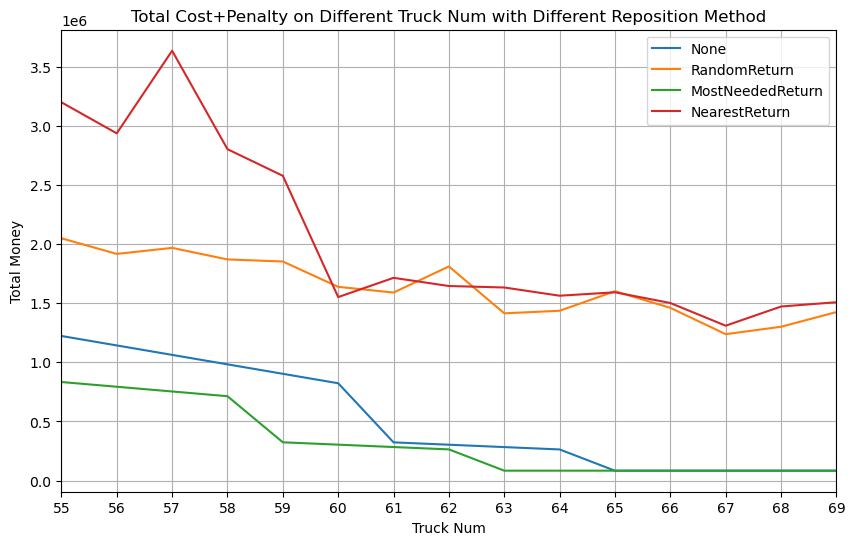

In [17]:
# 创建折线图

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for key, values in metric_dict.items():
    plt.plot(range(55, 55 + len(values)),values, label=key)
# 设置 x 轴范围和刻度
plt.xlim(55, 69)
plt.xticks(range(55, 70))  # 设置 x 轴刻度
# 添加图例、标题和标签
plt.legend()
plt.title('Total Cost+Penalty on Different Truck Num with Different Reposition Method')
plt.xlabel('Truck Num')
plt.ylabel('Total Money')
plt.grid()

# 显示图形
plt.show()

In [109]:
metric_dict_new = {}

In [ ]:
%load_ext autoreload
%autoreload 2
from reinforce import *
import simulator
import importlib
importlib.reload(simulator)
from simulator import *

from data_based_dispatch import *  

from heuristic_reposition import *


# agent = REINFORCE(4,32,params_path='./result/model_params_0408.pth')
# agent2 = REINFORCE(4,64,params_path='./result/model_params_0415_full.pth')
# env = Environment(30,4,running_day=1,start_date=datetime.datetime(2024,5,2))
# agent3 = REINFORCE(4,64,params_path='./result/model_params_0415_full_0502.pth')

agent = REINFORCE(7,64,params_path='./result/model_params_0513.pth')



start_truck = 60
end_truck = 70


raw_data_dispatch = RawDataDispatch()

dispatch_list_for_fixed_need = raw_data_dispatch.return_dispatch_list(env.unscheduled_orders.values())


reposition_funcs = [None,LeastTruckReturn,agent.take_action_max_prob]

for f in reposition_funcs:
    
    n = f.__name__ if f else 'None'
    
    
    
    while n in metric_dict_new:
        n = n + '/'
        
    print(n)
    metric_dict_new[n]= []
    
    for i in range(30,50):
        print(i)
        env = Environment(i,4,running_day=1,start_date=datetime.datetime(2024,5,2))
        env.continuous_running(dispatchs=dispatch_list_for_fixed_need,external_method=raw_data_dispatch.external_method_for_random_need,reposition_method=f)
        
        metric_dict_new[n].append(sum(env.penalty.values())+env.cost)
        
    


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Load model parameters from ./result/model_params_0408.pth
Load model parameters from ./result/model_params_0415_full.pth


/home/jiangrenchi/RL/reinforce.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.scorenet.load_state_dict(torch.load(params_path))
/home/jiangrenchi/RL/reinforce.py:

Load model parameters from ./result/model_params_0415_full_0502.pth
None
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
LeastTruckReturn
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
take_action_max_prob
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
take_action_max_prob/
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
take_action_max_prob//
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [89]:
del metric_dict_new['None_2']

In [108]:
metric_dict_new

{'None': [3641234.8799999985,
  3417234.8799999985,
  3200234.8799999985,
  2989234.8799999985,
  3056234.8799999985,
  2865234.8799999985,
  2695234.8799999985,
  1805234.8799999985,
  1701234.8799999985,
  1597234.8799999985,
  1493234.8799999985,
  733234.8799999984,
  618234.8799999984,
  508234.8799999984,
  403234.8799999984,
  308234.8799999984,
  238234.87999999837,
  178234.87999999837,
  128234.87999999839,
  83234.87999999839],
 'LeastTruckReturn': [1906782.0799999984,
  1764776.3199999984,
  1889776.3199999984,
  1760807.9999999984,
  1632807.9999999984,
  1525807.9999999984,
  1419807.9999999984,
  649807.9999999984,
  617807.9999999984,
  585807.9999999984,
  553836.7999999984,
  193836.7999999984,
  158836.7999999984,
  128836.79999999839,
  103836.79999999839,
  83836.79999999839,
  83836.79999999839,
  83836.79999999839,
  83836.79999999839,
  83836.79999999839],
 'take_action_max_prob': [1838985.2799999982,
  2192100.479999998,
  2093074.5599999982,
  1985261.75999999

In [74]:
sum(env.penalty.values())+env.cost

795602.4600000002

In [94]:
metric_dict_new['LeastTruckReturn']=metric_dict_new['MostNeededReturn']
del metric_dict_new['MostNeededReturn']

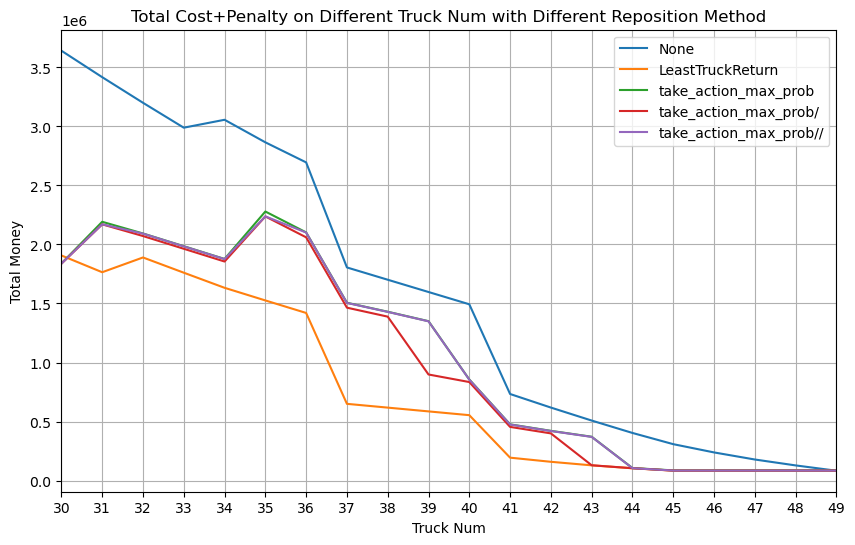

In [111]:
# 创建折线图

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for key, values in metric_dict_new.items():
    if key in ['RandomReturn','NearestReturn']:
        continue
    plt.plot(range(start_truck, start_truck + len(values)),values, label=key)
# 设置 x 轴范围和刻度
plt.xlim(start_truck, end_truck-1)
plt.xticks(range(start_truck, end_truck))  # 设置 x 轴刻度
# 添加图例、标题和标签
plt.legend()
plt.title('Total Cost+Penalty on Different Truck Num with Different Reposition Method')
plt.xlabel('Truck Num')
plt.ylabel('Total Money')
plt.grid()

# 显示图形
plt.show()